In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('loan_data.csv', sep = "\t")

In [3]:
df.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,wtd_loans,interest_rate,int_rate2,num_rate,numrate,int_rate3
0,641849,13200,13200,36 months,18.49,480.47,2 years,RENT,110000.0,Current,...,10546.93,4324.23,2653.07,1671.16,NaN,NaN,18.49%,NaN,NaN,18.49
1,734736,21600,21600,36 months,7.90,675.87,10+ years,MORTGAGE,95000.0,Fully Paid,...,0.00,23521.69,21600.00,1921.69,NaN,NaN,7.90%,NaN,NaN,7.90
2,807342,21000,21000,36 months,6.62,644.78,10+ years,MORTGAGE,121392.0,Current,...,15018.60,7092.58,5981.40,1111.18,NaN,NaN,6.62%,NaN,NaN,6.62
3,880114,5600,5600,36 months,9.99,180.67,1 year,RENT,75000.0,Current,...,4918.50,903.35,681.50,221.85,NaN,NaN,9.99%,NaN,NaN,9.99
4,999547,16000,16000,36 months,10.16,517.48,n/a,RENT,155000.0,Late (31-120 days),...,11999.79,5391.45,4000.21,1365.39,NaN,NaN,10.16%,NaN,NaN,10.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 29 columns):
id                        10000 non-null int64
loan_amnt                 10000 non-null int64
funded_amnt               10000 non-null int64
term                      9524 non-null object
int_rate                  9524 non-null float64
installment               9524 non-null float64
emp_length                9524 non-null object
home_ownership            9524 non-null object
annual_inc                9524 non-null float64
loan_status               9524 non-null object
purpose                   9524 non-null object
addr_state                10000 non-null object
dti                       9524 non-null float64
delinq_2yrs               9524 non-null float64
earliest_cr_line          9524 non-null object
mths_since_last_delinq    4100 non-null float64
open_acc                  9524 non-null float64
revol_bal                 9524 non-null float64
total_acc                 9524 non-nu

### Null Values

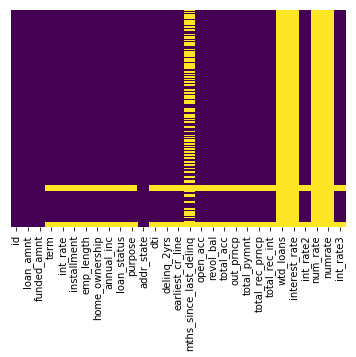

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [6]:
df.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'mths_since_last_delinq', 'open_acc', 'revol_bal', 'total_acc',
       'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int',
       'wtd_loans', 'interest_rate', 'int_rate2', 'num_rate', 'numrate',
       'int_rate3'],
      dtype='object')

In [7]:
df1 = df.drop(['mths_since_last_delinq', 'wtd_loans', 'interest_rate','num_rate', 'numrate'], axis = 1)
df1.dropna(axis = 0, inplace= True)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9524 entries, 0 to 9773
Data columns (total 24 columns):
id                  9524 non-null int64
loan_amnt           9524 non-null int64
funded_amnt         9524 non-null int64
term                9524 non-null object
int_rate            9524 non-null float64
installment         9524 non-null float64
emp_length          9524 non-null object
home_ownership      9524 non-null object
annual_inc          9524 non-null float64
loan_status         9524 non-null object
purpose             9524 non-null object
addr_state          9524 non-null object
dti                 9524 non-null float64
delinq_2yrs         9524 non-null float64
earliest_cr_line    9524 non-null object
open_acc            9524 non-null float64
revol_bal           9524 non-null float64
total_acc           9524 non-null float64
out_prncp           9524 non-null float64
total_pymnt         9524 non-null float64
total_rec_prncp     9524 non-null float64
total_rec_int       9524

In [9]:
df1['emp_length'].value_counts()

10+ years    3054
2 years       869
5 years       753
3 years       692
< 1 year      657
6 years       618
1 year        583
7 years       558
4 years       537
8 years       449
n/a           405
9 years       349
Name: emp_length, dtype: int64

In [10]:
df1.replace('n/a',np.nan, inplace = True)
df1.dropna(axis = 0, inplace= True)

In [11]:
len(df1[df1['emp_length'] == 'n/a'])

0

In [13]:
def emp_length_to_int(emplen):
    splitstr = emplen.lstrip().rstrip().split()
    if splitstr[0] == '<':
        return 0.5
    elif splitstr[0] == '10+':
        return 20
    else:
        return int(splitstr[0])    

In [14]:
df1['emp_length'] = df1['emp_length'].apply(emp_length_to_int)

In [15]:
df1['emp_length'].value_counts()

20.0    3054
2.0      869
5.0      753
3.0      692
0.5      657
6.0      618
1.0      583
7.0      558
4.0      537
8.0      449
9.0      349
Name: emp_length, dtype: int64

## Preprocessing - categorical

In [16]:
df1['loan_status'].value_counts()

Current               7769
Fully Paid             921
Charged Off            209
Late (31-120 days)     140
In Grace Period         46
Late (16-30 days)       19
Default                 15
Name: loan_status, dtype: int64

In [17]:
def loan_gorb(status):
    if status=='Current' or status == 'Fully Paid':
        return 1
    else:
        return 0

In [18]:
df1['Good_Loans'] = df1['loan_status'].apply(loan_gorb)

for i in range(6):
    print(df1[lst[i]].value_counts())
    print('\n')

In [24]:
df1['term'] = df1['term'].apply(lambda x: x.lstrip().rstrip())

Text(0.5,1,'loam_amnt distn')

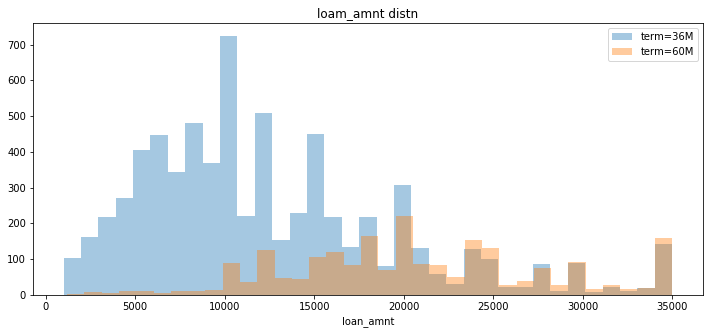

In [27]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['term'] == '36 months']['loan_amnt'], kde = False, bins = 35, label = 'term=36M')
sns.distplot(df1[df1['term'] == '60 months']['loan_amnt'], kde = False, bins = 35, label = 'term=60M')
plt.legend()
plt.title('loam_amnt distn')

Text(0.5,1,'loam_amnt distn')

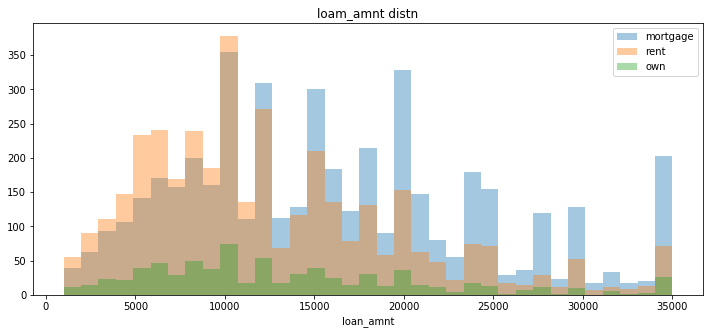

In [236]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['home_ownership'] == 'MORTGAGE']['loan_amnt'], kde = False, bins = 35, label = 'mortgage')
sns.distplot(df1[df1['home_ownership'] == 'RENT']['loan_amnt'], kde = False, bins = 35, label = 'rent')
sns.distplot(df1[df1['home_ownership'] == 'OWN']['loan_amnt'], kde = False, bins = 35, label = 'own')
plt.legend()
plt.title('loam_amnt distn')


### Changing to timestamp data

In [29]:
from datetime import datetime
import time

In [30]:
df1['earliest_cr_line'] = df1['earliest_cr_line'].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S"))

In [70]:
df1['credit_history'] = (datetime.today() - df1['earliest_cr_line']).apply(lambda x: x.days)

## Sanity Checks

### loan_amnt and funded_amnt

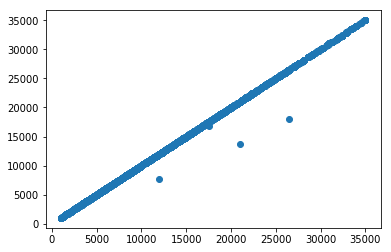

In [32]:
plt.scatter(x='loan_amnt',y = 'funded_amnt',data = df1)

In [40]:
#outliers here
outliers = df1[df1['loan_amnt'] != df1['funded_amnt']]
outliers

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,open_acc,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,int_rate2,int_rate3,Good_Loans
7,1058291,12000,7775,60 months,15.27,186.08,7.0,RENT,50000.0,Current,...,13.0,7008.0,25.0,5125.40,4808.96,2649.60,2159.36,15.27%,15.27,1
42,1063649,17500,16800,60 months,22.74,471.10,6.0,MORTGAGE,95000.0,Charged Off,...,12.0,23722.0,23.0,0.00,4704.90,1662.30,3042.60,22.74%,22.74,0
520,1367216,21000,13650,60 months,21.48,372.98,20.0,MORTGAGE,85000.0,Charged Off,...,15.0,15623.0,40.0,0.00,5214.44,2023.52,3190.92,21.48%,21.48,0
3873,1365626,26500,18000,36 months,8.90,571.56,2.0,MORTGAGE,175000.0,Current,...,8.0,38808.0,14.0,8598.28,11424.93,9401.72,2023.21,8.90%,8.90,1


In [49]:
outliers['funded_amnt'] - outliers['out_prncp'] - outliers['total_rec_prncp']

7       4.547474e-13
42      1.513770e+04
520     1.162648e+04
3873    0.000000e+00
dtype: float64

In [50]:
#notice that in the outliers #42 and #520, funded_amt != out_prncp + total_rec_prncp

In [80]:
(df1['total_pymnt'] != df1['total_rec_prncp'] + df1['total_rec_int']).sum()

1931

### Interest rates

In [167]:
(df1['int_rate'] != df1['int_rate3']).sum()

0

In [176]:
(df1['int_rate'] != df1['int_rate2'].apply(lambda x: float(x[:-1]))).sum()

0

## Multicollinearity

In [76]:
df2 = df1[['loan_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs','open_acc',
       'revol_bal', 'total_acc', 'out_prncp','total_rec_prncp','credit_history',
       'total_rec_int']]

In [77]:
m_corrall = np.corrcoef(df2, rowvar=0)

In [78]:
np.linalg.det(m_corrall)

0.00043387804771972553

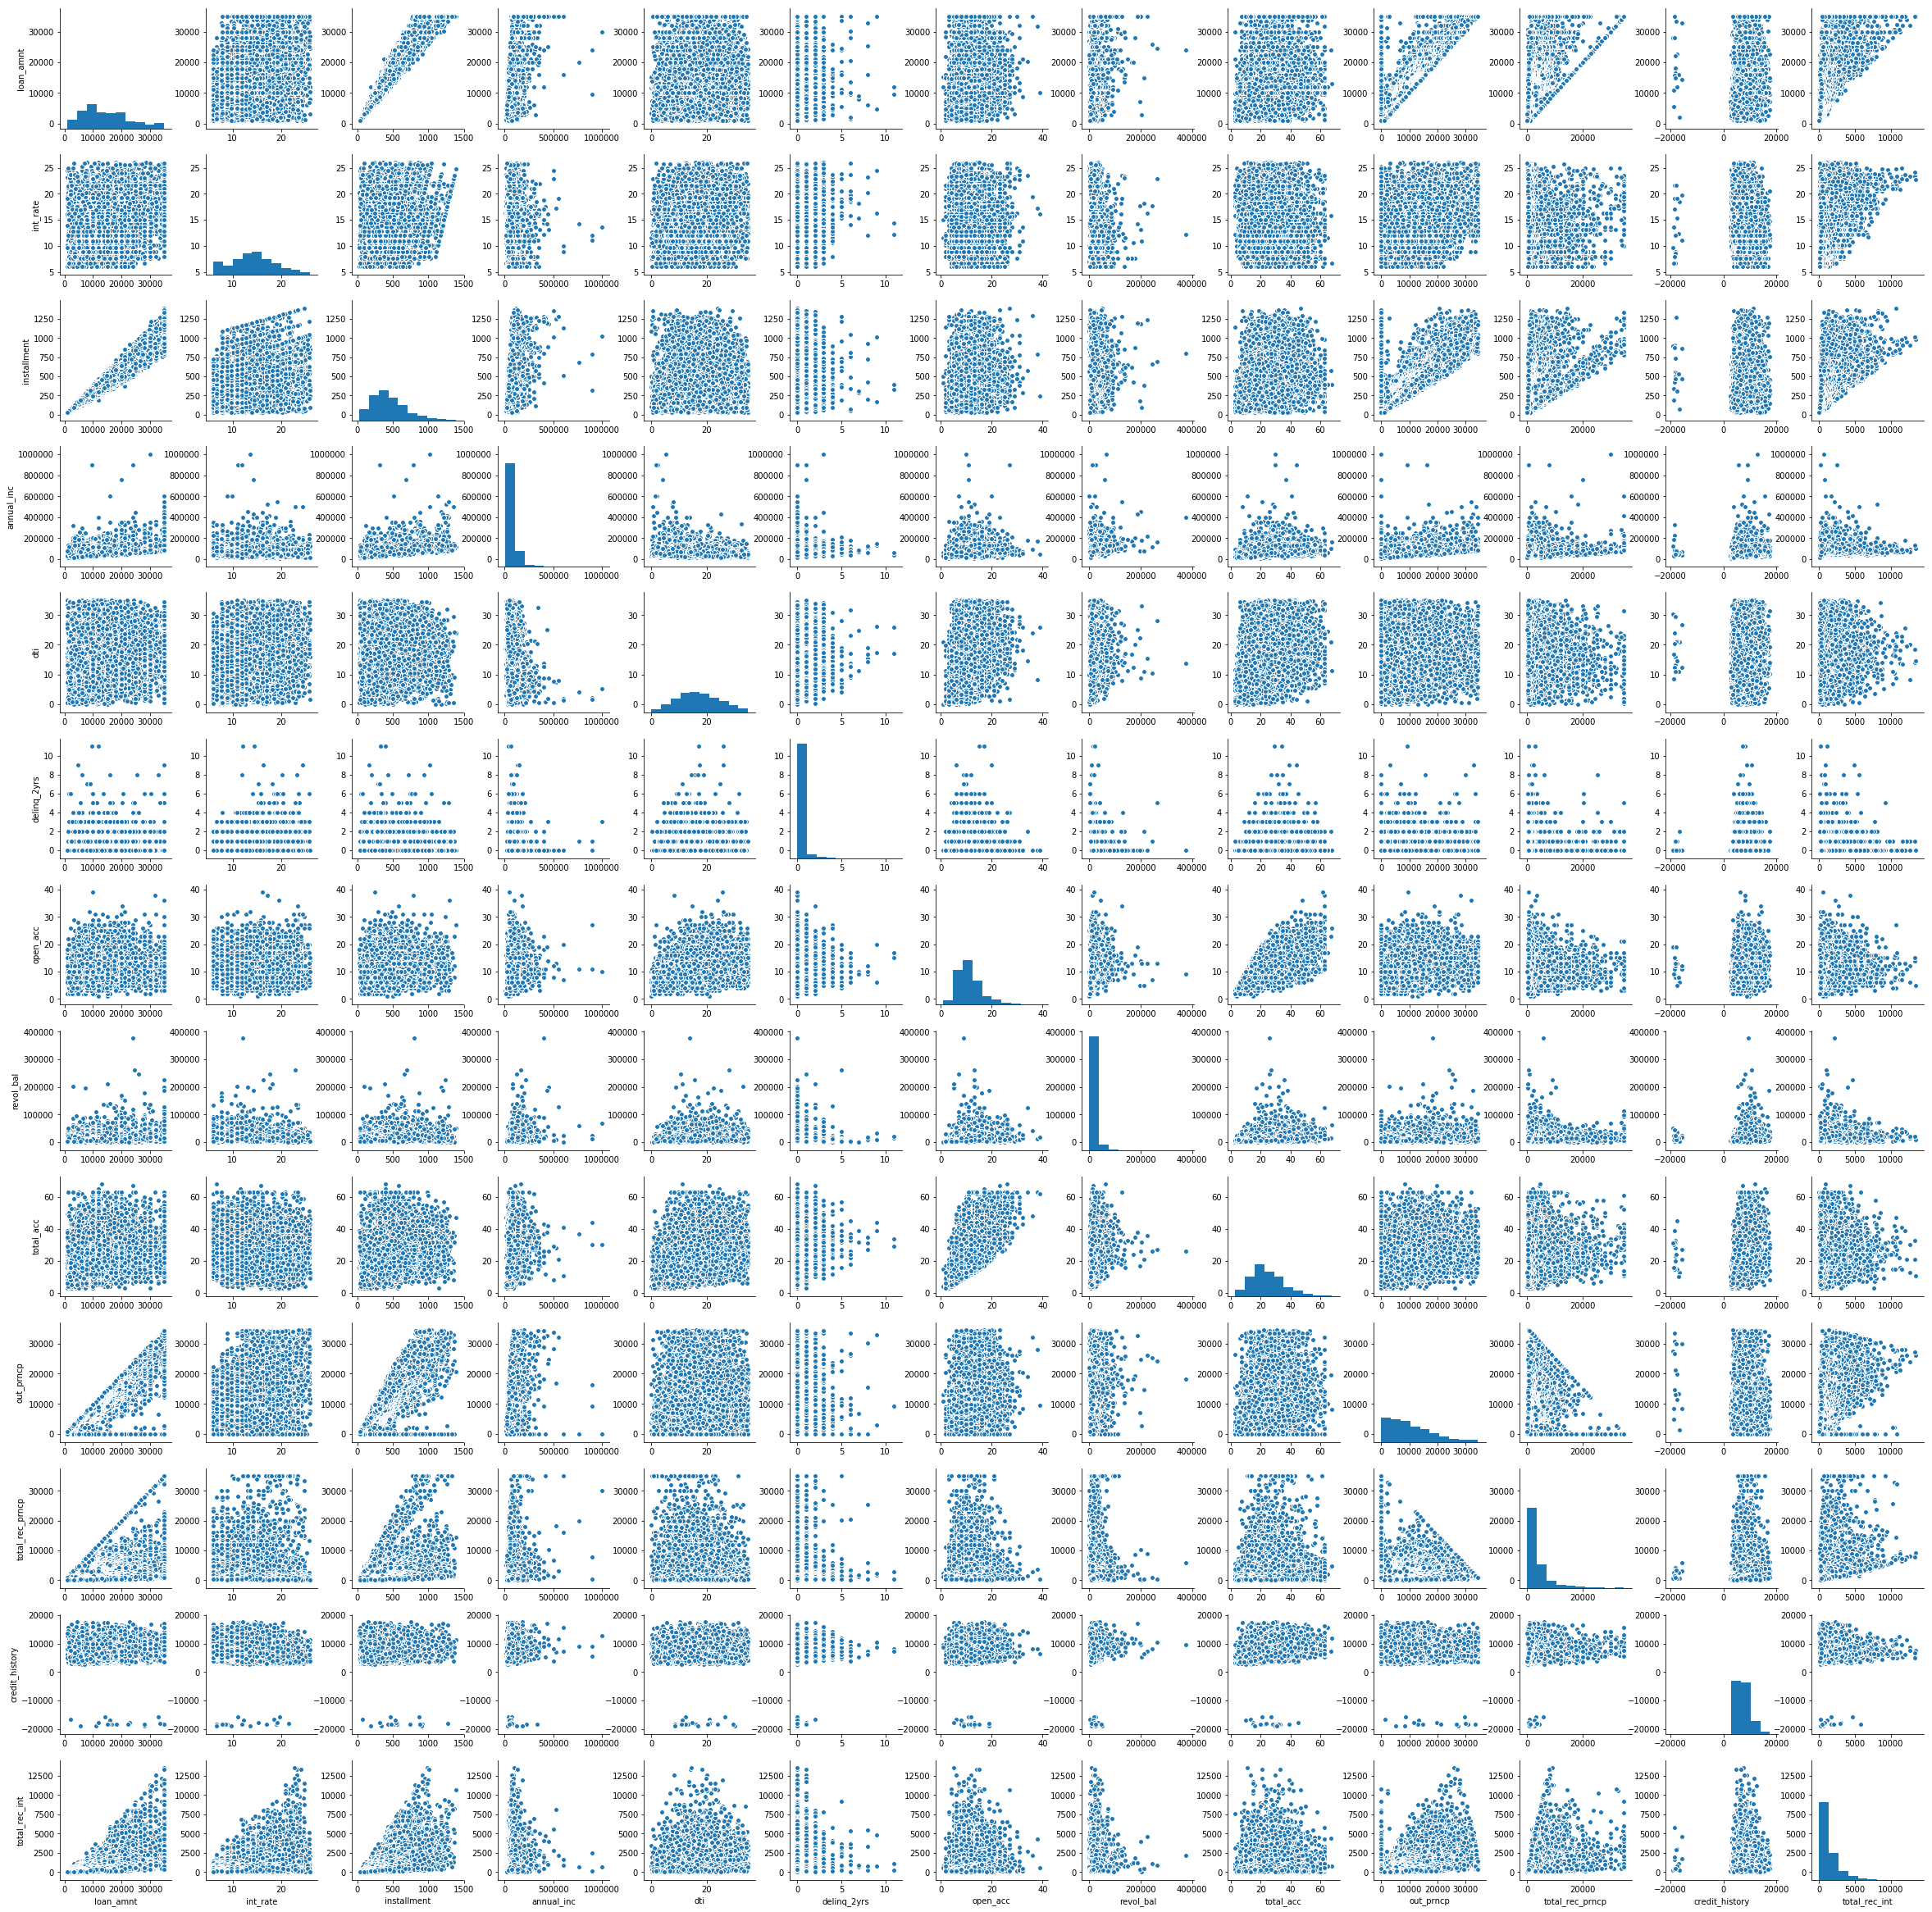

In [79]:
sns.pairplot(df2)

## installment 
- from graph we can tell installment x loan amount

In [51]:
# ore exploration
df1['intxfund'] = df1['int_rate']*df1['funded_amnt']

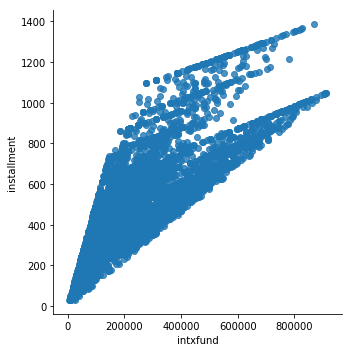

In [52]:
sns.lmplot('intxfund', 'installment', data=df1, fit_reg=False)

In [53]:
multicollinear_corr = np.corrcoef(df1[['intxfund','int_rate','funded_amnt']], rowvar=0)
multicollinear_corr

array([[ 1.        ,  0.58800951,  0.87592256],
       [ 0.58800951,  1.        ,  0.1990822 ],
       [ 0.87592256,  0.1990822 ,  1.        ]])

In [54]:
np.linalg.det(multicollinear_corr)  #very close to 0, high collinearity

0.052445664043365224

In [55]:
np.linalg.cond(multicollinear_corr)

72.217154072930811

In [56]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'int_rate2', 'int_rate3', 'Good_Loans', 'intxfund'],
      dtype='object')

## More exploration on principle

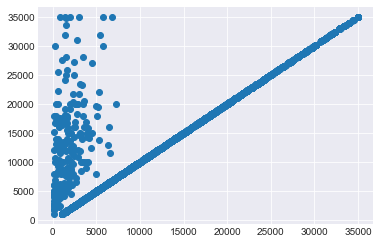

In [215]:
plt.scatter(df1['total_rec_prncp'] + df1['out_prncp'],df1['funded_amnt'])

In [59]:
prncp_df = df1[df1['funded_amnt'] - (df1['total_rec_prncp'] + df1['out_prncp']) != 0]

In [60]:
prncp_df

,id,loan_amnt,funded_amnt,term,int_rate,installment,emp_length,home_ownership,annual_inc,loan_status,...,revol_bal,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,int_rate2,int_rate3,Good_Loans,intxfund
8,1061580,27575,27575,60 months,12.69,623.05,1.0,RENT,91200.0,Charged Off,...,45053.0,29.0,0.00,1866.87,1003.66,863.21,12.69%,12.69,0,349926.75
14,1073395,21000,21000,60 months,19.91,555.33,6.0,RENT,42000.0,Current,...,28632.0,12.0,14663.03,13862.75,6336.96,7525.79,19.91%,19.91,1,418110.00
16,1074785,4800,4800,36 months,12.69,161.02,6.0,MORTGAGE,48000.0,Charged Off,...,1361.0,7.0,0.00,1925.64,1398.06,527.58,12.69%,12.69,0,60912.00
18,1076316,19200,19200,60 months,20.30,511.90,20.0,MORTGAGE,150000.0,Charged Off,...,17541.0,19.0,0.00,5118.17,2013.42,3088.78,20.30%,20.30,0,389760.00
24,1080438,21850,21850,60 months,17.27,546.21,1.0,MORTGAGE,50000.0,Current,...,14810.0,24.0,14941.49,13644.25,6908.52,6735.73,17.27%,17.27,1,377349.50
30,1086441,7200,7200,36 months,11.71,238.15,0.5,RENT,37000.0,Current,...,6788.0,32.0,2479.56,5944.75,4720.43,1224.32,11.71%,11.71,1,84312.00
31,1086976,11500,11500,36 months,6.62,353.10,3.0,RENT,60500.0,Current,...,21309.0,39.0,3776.46,8806.75,7723.55,1083.20,6.62%,6.62,1,76130.00
32,1088041,11700,11700,36 months,7.51,364.00,2.0,RENT,45000.0,Current,...,0.0,9.0,3734.75,9215.67,7965.24,1250.43,7.51%,7.51,1,87867.00
42,1063649,17500,16800,60 months,22.74,471.10,6.0,MORTGAGE,95000.0,Charged Off,...,23722.0,23.0,0.00,4704.90,1662.30,3042.60,22.74%,22.74,0,382032.00
43,1065549,11200,11200,36 months,11.71,370.46,4.0,RENT,82000.0,Current,...,24886.0,35.0,3529.42,9611.21,7670.59,1940.62,11.71%,11.71,1,131152.00


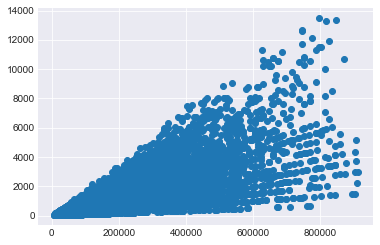

In [192]:
plt.scatter(df1['intxfund'],df1['total_rec_int'])

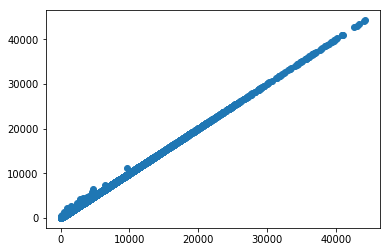

In [81]:
plt.scatter(df1['total_rec_prncp'] + df1['total_rec_int'],df1['total_pymnt'])

## Select the following features

In [61]:
df1.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'emp_length', 'home_ownership', 'annual_inc', 'loan_status', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'open_acc',
       'revol_bal', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp',
       'total_rec_int', 'int_rate2', 'int_rate3', 'Good_Loans', 'intxfund'],
      dtype='object')

In [83]:
df3 = df1[['funded_amnt', 'term', 'int_rate',
          'emp_length', 'home_ownership', 'annual_inc', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'credit_history', 'open_acc',
       'revol_bal', 'total_acc', 'out_prncp', 
        'total_rec_prncp', 'Good_Loans']]

In [84]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9119 entries, 0 to 9773
Data columns (total 17 columns):
funded_amnt        9119 non-null int64
term               9119 non-null object
int_rate           9119 non-null float64
emp_length         9119 non-null float64
home_ownership     9119 non-null object
annual_inc         9119 non-null float64
purpose            9119 non-null object
addr_state         9119 non-null object
dti                9119 non-null float64
delinq_2yrs        9119 non-null float64
credit_history     9119 non-null int64
open_acc           9119 non-null float64
revol_bal          9119 non-null float64
total_acc          9119 non-null float64
out_prncp          9119 non-null float64
total_rec_prncp    9119 non-null float64
Good_Loans         9119 non-null int64
dtypes: float64(10), int64(3), object(4)
memory usage: 1.4+ MB


In [86]:
cat_feats = ['term', 'home_ownership', 'purpose', 'addr_state']

In [90]:
final_data = pd.get_dummies(df3, columns = cat_feats, drop_first = True)

In [94]:
final_data.head()

,funded_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,credit_history,open_acc,revol_bal,total_acc,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,13200,18.49,2.0,110000.0,17.02,0.0,6256,16.0,16062.0,36.0,...,0,0,0,0,0,0,0,0,0,0
1,21600,7.90,20.0,95000.0,3.42,0.0,6842,9.0,416.0,24.0,...,0,0,0,0,0,0,0,1,0,0
2,21000,6.62,20.0,121392.0,19.53,0.0,8077,18.0,40721.0,37.0,...,0,0,0,0,0,0,0,0,0,0
3,5600,9.99,1.0,75000.0,8.24,0.0,4778,17.0,12188.0,33.0,...,0,0,0,0,0,0,0,0,0,0
5,10800,11.14,5.0,57000.0,18.32,0.0,7564,9.0,21924.0,18.0,...,0,0,0,0,0,0,0,0,0,0


[['funded_amnt', 'term', 'int_rate',
          'emp_length', 'home_ownership', 'annual_inc', 'purpose',
       'addr_state', 'dti', 'delinq_2yrs', 'credit_history', 'open_acc',
       'revol_bal', 'total_acc', 'out_prncp', 
        'total_rec_prncp', 'Good_Loans']]

Text(0.5,1,'funded_amnt distn')

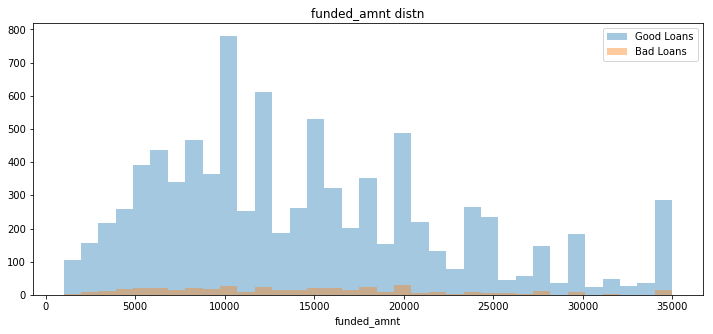

In [238]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['Good_Loans'] == 1]['funded_amnt'], kde = False, bins = 35, label = 'Good Loans')
sns.distplot(df1[df1['Good_Loans'] == 0]['funded_amnt'], kde = False, bins = 35, label = 'Bad Loans')
plt.legend()
plt.title('funded_amnt distn')

Text(0.5,1,'int_rate distn')

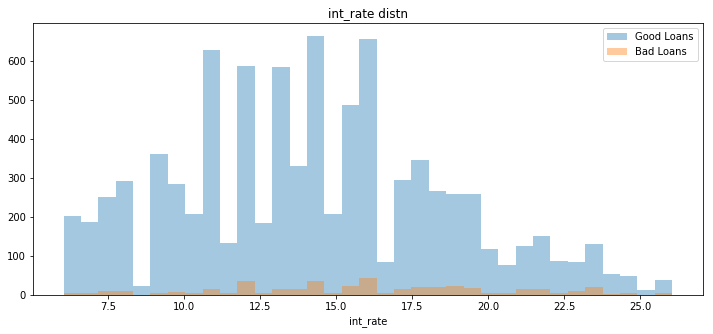

In [240]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['Good_Loans'] == 1]['int_rate'], kde = False, bins = 35, label = 'Good Loans')
sns.distplot(df1[df1['Good_Loans'] == 0]['int_rate'], kde = False, bins = 35, label = 'Bad Loans')
plt.legend()
plt.title('int_rate distn')

Text(0.5,1,'emp_length distn')

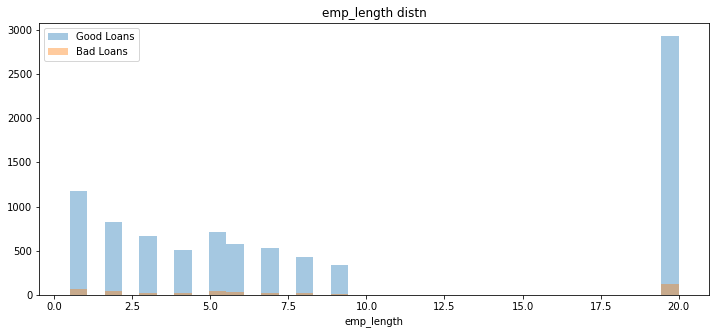

In [241]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['Good_Loans'] == 1]['emp_length'], kde = False, bins = 35, label = 'Good Loans')
sns.distplot(df1[df1['Good_Loans'] == 0]['emp_length'], kde = False, bins = 35, label = 'Bad Loans')
plt.legend()
plt.title('emp_length distn')

Text(0.5,1,'dti')

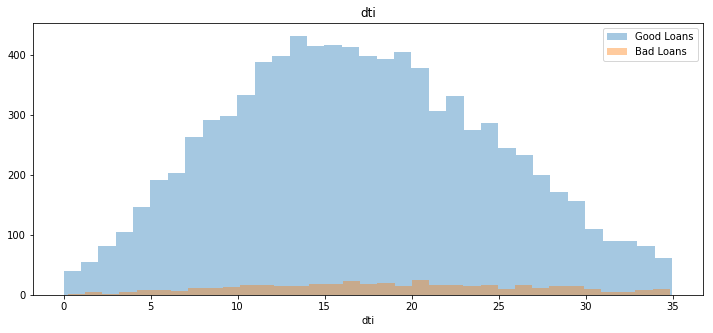

In [242]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['Good_Loans'] == 1]['dti'], kde = False, bins = 35, label = 'Good Loans')
sns.distplot(df1[df1['Good_Loans'] == 0]['dti'], kde = False, bins = 35, label = 'Bad Loans')
plt.legend()
plt.title('dti')

Text(0.5,1,'credit_history distn')

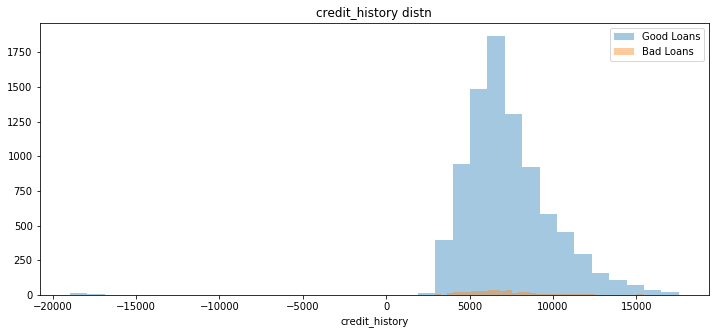

In [243]:
plt.figure(figsize = (12,5))
sns.distplot(df1[df1['Good_Loans'] == 1]['credit_history'], kde = False, bins = 35, label = 'Good Loans')
sns.distplot(df1[df1['Good_Loans'] == 0]['credit_history'], kde = False, bins = 35, label = 'Bad Loans')
plt.legend()
plt.title('credit_history distn')

## Train Test Split

In [113]:
from sklearn.model_selection import train_test_split

In [114]:
X = final_data.drop('Good_Loans', axis = 1)
y = final_data['Good_Loans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## Decision Tree Model

In [115]:
from sklearn.tree import DecisionTreeClassifier

In [116]:
dtree = DecisionTreeClassifier()

In [117]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [118]:
predictions = dtree.predict(X_test)

In [119]:
from sklearn.metrics import classification_report, confusion_matrix

In [120]:
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

             precision    recall  f1-score   support

          0       0.46      0.53      0.49        86
          1       0.98      0.97      0.97      1738

avg / total       0.95      0.95      0.95      1824

[[  46   40]
 [  55 1683]]


- Not that good, considering we want to identify the bad loans
- this has good identification for the good loans

## Training the Random Forest model

In [213]:
X = final_data.drop('Good_Loans', axis = 1)
y = final_data['Good_Loans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [214]:
from sklearn.ensemble import RandomForestClassifier

In [215]:
rfc = RandomForestClassifier(n_estimators=100)

In [216]:
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [217]:
pred_rfc = rfc.predict(X_test)

In [218]:
print(classification_report(y_test, pred_rfc))


             precision    recall  f1-score   support

          0       1.00      0.19      0.32       115
          1       0.97      1.00      0.98      2621

avg / total       0.97      0.97      0.95      2736



In [219]:
print(confusion_matrix(y_test, pred_rfc))

[[  22   93]
 [   0 2621]]


- Also not good

## Logistic Regression

In [220]:
X = final_data.drop('Good_Loans', axis = 1)
y = final_data['Good_Loans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [221]:
from sklearn.linear_model import LogisticRegression

In [222]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [223]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       1.00      0.48      0.65       130
          1       0.97      1.00      0.99      2606

avg / total       0.98      0.98      0.97      2736



In [224]:
print(confusion_matrix(y_test, predictions))

[[  62   68]
 [   0 2606]]


## SVM

In [225]:
X = final_data.drop('Good_Loans', axis = 1)
y = final_data['Good_Loans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [226]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0  119]
 [   0 2617]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       119
          1       0.96      1.00      0.98      2617

avg / total       0.91      0.96      0.94      2736



C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


- not good, sorted all into one class

### Adjust parameters through grid search

In [228]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 

In [229]:
from sklearn.model_selection import GridSearchCV

In [230]:
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [231]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9511507750117426, total=   4.9s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    8.3s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9515749882463563, total=   4.5s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   15.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9515749882463563, total=   4.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9511507750117426, total=   4.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9515749882463563, total=   4.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9515749882463563, total=   4.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9511507750117426, total=   4.6s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9515749882463563, total=   4.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9515749882463563, total=   4.5s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9515749882463563, total=   4.9s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9515749882463563, total=   4.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9511507750117426, total=   5.2s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9515749882463563, total=   4.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9515749882463563, total=   4.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9511507750117426, total=   5.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9515749882463563, total=   5.4s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed: 10.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [232]:
grid.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}

In [233]:
grid.best_estimator_

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [234]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[   0  119]
 [   0 2617]]
             precision    recall  f1-score   support

          0       0.00      0.00      0.00       119
          1       0.96      1.00      0.98      2617

avg / total       0.91      0.96      0.94      2736



C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Let's try if scaling helps

In [195]:
 from sklearn.preprocessing import MinMaxScaler

In [196]:
scaler = MinMaxScaler()

In [204]:
scaled_data = pd.DataFrame(scaler.fit_transform(final_data), 
                    columns = final_data.columns)

In [205]:
scaled_data.head()

,funded_amnt,int_rate,emp_length,annual_inc,dti,delinq_2yrs,credit_history,open_acc,revol_bal,total_acc,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
0,0.358824,0.622067,0.076923,0.103275,0.486564,0.0,0.690734,0.394737,0.042641,0.507692,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.605882,0.093360,1.000000,0.088161,0.097770,0.0,0.706785,0.210526,0.001104,0.323077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.588235,0.029456,1.000000,0.114753,0.558319,0.0,0.740612,0.447368,0.108105,0.523077,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.135294,0.197703,0.025641,0.068010,0.235563,0.0,0.650251,0.421053,0.032356,0.461538,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.288235,0.255117,0.230769,0.049874,0.523728,0.0,0.726561,0.210526,0.058203,0.230769,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
X = scaled_data.drop('Good_Loans', axis = 1)
y = scaled_data['Good_Loans']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [266]:
##Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

             precision    recall  f1-score   support

        0.0       0.43      0.52      0.47       131
        1.0       0.98      0.97      0.97      2605

avg / total       0.95      0.94      0.95      2736

[[  68   63]
 [  90 2515]]


In [267]:
#random forest
rfc = RandomForestClassifier(n_estimators=1000)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,rfc_pred))
print(classification_report(y_test,rfc_pred))

[[  26  105]
 [   0 2605]]
             precision    recall  f1-score   support

        0.0       1.00      0.20      0.33       131
        1.0       0.96      1.00      0.98      2605

avg / total       0.96      0.96      0.95      2736



In [268]:
#logit
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)
print(classification_report(y_test,predictions))
confusion_matrix(y_test, predictions)

             precision    recall  f1-score   support

        0.0       1.00      0.16      0.28       131
        1.0       0.96      1.00      0.98      2605

avg / total       0.96      0.96      0.95      2736



array([[  21,  110],
       [   0, 2605]], dtype=int64)

## SVM

In [269]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   0  131]
 [   0 2605]]
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00       131
        1.0       0.95      1.00      0.98      2605

avg / total       0.91      0.95      0.93      2736



C:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [279]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9539689995302959, total=   1.2s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9543958627174424, total=   1.8s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    5.0s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9543958627174424, total=   1.4s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9539689995302959, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9543958627174424, total=   0.9s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9543958627174424, total=   0.7s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9539689995302959, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9543958627174424, total=   0.5s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9543958627174424, total=   0.4s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9543958627174424, total=   0.5s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9543958627174424, total=   0.6s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9356505401596994, total=   1.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9355900329102022, total=   0.9s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9365303244005642, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.954908407703147, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9445228020686413, total=   1.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.1min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [285]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [286]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [287]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  51   32]
 [   0 1741]]
             precision    recall  f1-score   support

        0.0       1.00      0.61      0.76        83
        1.0       0.98      1.00      0.99      1741

avg / total       0.98      0.98      0.98      1824



In [288]:
grid.score(X_train, y_train)

0.97381768334475671

In [291]:
grid.score(X_test, y_test)

0.98245614035087714

- most satisfactory so far, try again with different training-test split

## K-Neighbors

In [270]:
from sklearn.neighbors import KNeighborsClassifier

In [280]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [281]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(7295, 73)
(7295,)
(1824, 73)
(1824,)


In [282]:
data_knn = KNeighborsClassifier(n_neighbors = 10, metric='euclidean')
data_knn.fit(X_train, y_train)
predictions = data_knn.predict(X_test)

In [283]:
rsquared_train = data_knn.score(X_train, y_train)
rsquared_test = data_knn.score(X_test, y_test)
print ('Training data R-squared:')
print(rsquared_train)
print ('Test data R-squared:')
print(rsquared_test)

Training data R-squared:
0.95270733379
Test data R-squared:
0.955043859649


In [284]:
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))

[[   1   82]
 [   0 1741]]
             precision    recall  f1-score   support

        0.0       1.00      0.01      0.02        83
        1.0       0.96      1.00      0.98      1741

avg / total       0.96      0.96      0.93      1824



In [294]:
param_grid = {'C': [0.1,1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVC(),param_grid,refit=True,verbose=3)
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9548872180451128, total=   1.6s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9548872180451128, total=   1.4s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.9s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.9548660084626234, total=   1.3s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9548872180451128, total=   0.7s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9548872180451128, total=   0.8s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.9548660084626234, total=   0.8s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9548872180451128, total=   0.3s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9548872180451128, total=   0.4s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.9548660084626234, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=rbf .....

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9548872180451128, total=   0.4s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.9548660084626234, total=   0.3s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9370300751879699, total=   1.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9370300751879699, total=   1.1s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.9346497414198401, total=   1.1s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9530075187969925, total=   0.9s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV]  C=1000, gamma=0.1, kernel=rbf, score=0.9530075187969925, total=   1.1s
[CV] C=1000, gamma=0.1, kernel=rbf ..

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:  2.0min finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [295]:
grid.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [296]:
grid.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [297]:
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))
print(classification_report(y_test,grid_predictions))

[[  72   69]
 [   0 2595]]
             precision    recall  f1-score   support

        0.0       1.00      0.51      0.68       141
        1.0       0.97      1.00      0.99      2595

avg / total       0.98      0.97      0.97      2736

